<a href="https://colab.research.google.com/github/cyberdreams8/water-quality-analysis-and-prediction-2/blob/main/PDS_waterquality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Example of Thresholds (WHO and general guidelines):
These are examples and may vary based on your local standards.

pH: 6.5 - 8.5


Turbidity: ≤ 5 NTU


Conductivity: ≤ 1500 µS/cm


Chloramines: ≤ 4 mg/L


Trihalomethanes: ≤ 80 µg/L


Summary
Critical Features: pH, turbidity, conductivity, chloramines, and THMs are often considered essential for assessing potability.
Secondary Features: Hardness and sulfate can impact taste and non-health-related qualities but are less critical for immediate safety assessments.



Conclusion
For a robust assessment of water potability, focus primarily on pH, turbidity, conductivity, chloramines, and THMs. Other factors may still be relevant but can be considered supplementary based on local regulations and health standards.




##Importing the necessary liabraries

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##Reading the Dataset

In [81]:
Dataset = pd.read_csv("https://raw.githubusercontent.com/cyberdreams8/water-quality-analysis-and-prediction-2/refs/heads/main/water_quality_dataset.csv")
Dataset

,Unnamed: 0,Station Code,Station Name,STATE,Temperature Min,Temperature Max,pH Min,pH Max,Conductivity (µmhos/cm) Min,Conductivity (µmhos/cm) Max,Year,Turbidity (NTU),Dissolved Oxygen (mg/L),BOD (mg/L),TDS (mg/L),Hardness (mg/L),Potability
0,0,15.0,"WELL AT KUYYURA, A.P.",ANDHRA PRADESH,23.0,28.0,6.82,7.85,195.0,226.0,2012,4.070235,10.134345,0.962008,578.810775,104.950680,Drinkable
1,1,16.0,WELL AT TADAVAI A.P.,ANDHRA PRADESH,27.0,28.0,7.21,7.72,663.0,1121.0,2012,11.564508,10.595564,7.927889,529.066337,205.746813,Not Drinkable
2,2,26.0,"WELL AT VIJAYWADA, A.P.",ANDHRA PRADESH,26.0,32.0,7.19,7.39,1601.0,1661.0,2012,14.543769,10.297229,1.070086,920.225147,217.964732,Not Drinkable
3,3,27.0,"WELL AT PEDDAVOORA, A.P.",ANDHRA PRADESH,26.0,27.0,7.82,8.80,1420.0,1668.0,2012,11.564508,10.297229,6.486625,1198.784496,182.125474,Not Drinkable
4,4,1513.0,"B W. - KRISHNA MURTHY, D.NO. 48-16-43 AUTONAGA...",ANDHRA PRADESH,25.0,30.0,6.80,7.11,1454.0,1575.0,2012,10.979909,3.262711,6.434438,1043.741646,123.066151,Not Drinkable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6311,983,2533.0,SURI TOWN NEAR BUS STAND,WEST BENGAL,27.0,30.0,7.20,7.90,358.0,651.0,2021,7.840992,8.334117,6.326797,723.104180,472.638138,Not Drinkable
6312,984,1773.0,"TANGRA, CALCUTTA , WEST\nBENGAL",WEST BENGAL,28.0,31.0,7.30,7.40,1435.0,1730.0,2021,4.675666,NaN,5.193830,230.164378,234.763384,Not Drinkable
6313,985,1774.0,"TOPSIA CALCUTTA, WEST\nBENGAL",WEST BENGAL,29.0,31.0,7.30,7.30,1705.0,1921.0,2021,6.479175,5.978842,6.091671,920.225147,123.066151,Not Drinkable
6314,986,2546.0,ULUBERIA COLLEGE AT HOWRAH,WEST BENGAL,26.0,30.0,7.20,7.60,909.0,1090.0,2021,1.465082,8.737017,6.525324,480.030896,373.339982,Not Drinkable


In [82]:
Dataset.columns

Index(['Unnamed: 0', 'Station Code', 'Station Name', 'STATE',
       'Temperature Min', 'Temperature Max', 'pH Min', 'pH Max',
       'Conductivity (µmhos/cm) Min', 'Conductivity (µmhos/cm) Max', 'Year',
       'Turbidity (NTU)', 'Dissolved Oxygen (mg/L)', 'BOD (mg/L)',
       'TDS (mg/L)', 'Hardness (mg/L)', 'Potability'],
      dtype='object')

In [83]:
Dataset

,Unnamed: 0,Station Code,Station Name,STATE,Temperature Min,Temperature Max,pH Min,pH Max,Conductivity (µmhos/cm) Min,Conductivity (µmhos/cm) Max,Year,Turbidity (NTU),Dissolved Oxygen (mg/L),BOD (mg/L),TDS (mg/L),Hardness (mg/L),Potability
0,0,15.0,"WELL AT KUYYURA, A.P.",ANDHRA PRADESH,23.0,28.0,6.82,7.85,195.0,226.0,2012,4.070235,10.134345,0.962008,578.810775,104.950680,Drinkable
1,1,16.0,WELL AT TADAVAI A.P.,ANDHRA PRADESH,27.0,28.0,7.21,7.72,663.0,1121.0,2012,11.564508,10.595564,7.927889,529.066337,205.746813,Not Drinkable
2,2,26.0,"WELL AT VIJAYWADA, A.P.",ANDHRA PRADESH,26.0,32.0,7.19,7.39,1601.0,1661.0,2012,14.543769,10.297229,1.070086,920.225147,217.964732,Not Drinkable
3,3,27.0,"WELL AT PEDDAVOORA, A.P.",ANDHRA PRADESH,26.0,27.0,7.82,8.80,1420.0,1668.0,2012,11.564508,10.297229,6.486625,1198.784496,182.125474,Not Drinkable
4,4,1513.0,"B W. - KRISHNA MURTHY, D.NO. 48-16-43 AUTONAGA...",ANDHRA PRADESH,25.0,30.0,6.80,7.11,1454.0,1575.0,2012,10.979909,3.262711,6.434438,1043.741646,123.066151,Not Drinkable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6311,983,2533.0,SURI TOWN NEAR BUS STAND,WEST BENGAL,27.0,30.0,7.20,7.90,358.0,651.0,2021,7.840992,8.334117,6.326797,723.104180,472.638138,Not Drinkable
6312,984,1773.0,"TANGRA, CALCUTTA , WEST\nBENGAL",WEST BENGAL,28.0,31.0,7.30,7.40,1435.0,1730.0,2021,4.675666,NaN,5.193830,230.164378,234.763384,Not Drinkable
6313,985,1774.0,"TOPSIA CALCUTTA, WEST\nBENGAL",WEST BENGAL,29.0,31.0,7.30,7.30,1705.0,1921.0,2021,6.479175,5.978842,6.091671,920.225147,123.066151,Not Drinkable
6314,986,2546.0,ULUBERIA COLLEGE AT HOWRAH,WEST BENGAL,26.0,30.0,7.20,7.60,909.0,1090.0,2021,1.465082,8.737017,6.525324,480.030896,373.339982,Not Drinkable


In [84]:
Dataset.head()

,Unnamed: 0,Station Code,Station Name,STATE,Temperature Min,Temperature Max,pH Min,pH Max,Conductivity (µmhos/cm) Min,Conductivity (µmhos/cm) Max,Year,Turbidity (NTU),Dissolved Oxygen (mg/L),BOD (mg/L),TDS (mg/L),Hardness (mg/L),Potability
0,0,15.0,"WELL AT KUYYURA, A.P.",ANDHRA PRADESH,23.0,28.0,6.82,7.85,195.0,226.0,2012,4.070235,10.134345,0.962008,578.810775,104.950680,Drinkable
1,1,16.0,WELL AT TADAVAI A.P.,ANDHRA PRADESH,27.0,28.0,7.21,7.72,663.0,1121.0,2012,11.564508,10.595564,7.927889,529.066337,205.746813,Not Drinkable
2,2,26.0,"WELL AT VIJAYWADA, A.P.",ANDHRA PRADESH,26.0,32.0,7.19,7.39,1601.0,1661.0,2012,14.543769,10.297229,1.070086,920.225147,217.964732,Not Drinkable
3,3,27.0,"WELL AT PEDDAVOORA, A.P.",ANDHRA PRADESH,26.0,27.0,7.82,8.80,1420.0,1668.0,2012,11.564508,10.297229,6.486625,1198.784496,182.125474,Not Drinkable
4,4,1513.0,"B W. - KRISHNA MURTHY, D.NO. 48-16-43 AUTONAGA...",ANDHRA PRADESH,25.0,30.0,6.80,7.11,1454.0,1575.0,2012,10.979909,3.262711,6.434438,1043.741646,123.066151,Not Drinkable


In [85]:
Dataset.tail()

,Unnamed: 0,Station Code,Station Name,STATE,Temperature Min,Temperature Max,pH Min,pH Max,Conductivity (µmhos/cm) Min,Conductivity (µmhos/cm) Max,Year,Turbidity (NTU),Dissolved Oxygen (mg/L),BOD (mg/L),TDS (mg/L),Hardness (mg/L),Potability
6311,983,2533.0,SURI TOWN NEAR BUS STAND,WEST BENGAL,27.0,30.0,7.2,7.9,358.0,651.0,2021,7.840992,8.334117,6.326797,723.104180,472.638138,Not Drinkable
6312,984,1773.0,"TANGRA, CALCUTTA , WEST\nBENGAL",WEST BENGAL,28.0,31.0,7.3,7.4,1435.0,1730.0,2021,4.675666,NaN,5.193830,230.164378,234.763384,Not Drinkable
6313,985,1774.0,"TOPSIA CALCUTTA, WEST\nBENGAL",WEST BENGAL,29.0,31.0,7.3,7.3,1705.0,1921.0,2021,6.479175,5.978842,6.091671,920.225147,123.066151,Not Drinkable
6314,986,2546.0,ULUBERIA COLLEGE AT HOWRAH,WEST BENGAL,26.0,30.0,7.2,7.6,909.0,1090.0,2021,1.465082,8.737017,6.525324,480.030896,373.339982,Not Drinkable
6315,987,2535.0,VISVA BHARATI,WEST BENGAL,30.0,31.0,7.9,8.2,370.0,437.0,2021,0.678409,4.987829,5.729190,578.810775,51.550765,Not Drinkable


##Sanity Check of Data

In [86]:
Dataset.shape

(6316, 17)

In [87]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6316 entries, 0 to 6315
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   6316 non-null   int64  
 1   Station Code                 6240 non-null   float64
 2   Station Name                 6267 non-null   object 
 3   STATE                        6241 non-null   object 
 4   Temperature Min              5818 non-null   float64
 5   Temperature Max              5818 non-null   float64
 6   pH Min                       6195 non-null   float64
 7   pH Max                       6195 non-null   float64
 8   Conductivity (µmhos/cm) Min  6124 non-null   float64
 9   Conductivity (µmhos/cm) Max  6124 non-null   float64
 10  Year                         6316 non-null   int64  
 11  Turbidity (NTU)              6255 non-null   float64
 12  Dissolved Oxygen (mg/L)      6253 non-null   float64
 13  BOD (mg/L)        

In [88]:
#finding missing values
Dataset.isnull().sum()

,0
Unnamed: 0,0
Station Code,76
Station Name,49
STATE,75
Temperature Min,498
Temperature Max,498
pH Min,121
pH Max,121
Conductivity (µmhos/cm) Min,192
Conductivity (µmhos/cm) Max,192


In [89]:
#finding missing values in percentage
Dataset.isnull().sum()/Dataset.shape[0]*100

,0
Unnamed: 0,0.000000
Station Code,1.203293
Station Name,0.775807
STATE,1.187460
Temperature Min,7.884737
Temperature Max,7.884737
pH Min,1.915769
pH Max,1.915769
Conductivity (µmhos/cm) Min,3.039899
Conductivity (µmhos/cm) Max,3.039899


In [90]:
#finding duplicates
Dataset.duplicated().sum()

0

In [91]:
#identifying garbage values
for i in Dataset.select_dtypes(include='object').columns:
  print(Dataset[i].value_counts())
  print("***"*10)

Station Name
BEGUSARAI                                                                                    10
PATNA                                                                                        10
FULBARI BARRAGE                                                                               9
NANGAL, PUNJAB                                                                                9
VISVA BHARATI                                                                                 9
                                                                                             ..
HAND PUMP WATER NEAR D.M OFFICE, MADHEPURA                                                    1
HAND PUMP WATER AT COLLECTRIATE OFFICE, MADHUBANI                                             1
TAP WATER INSIDE THE CAMPUS OF TOURIST CAFETERIA,\nNALANDA                                    1
HAND PUMP WATER AT CIVIL COURT, NALANDA                                                       1
GROUND WATER AT BHAGWAN\nIN

##Exploratory Data Analysis (EDA)

In [92]:
Dataset.columns

Index(['Unnamed: 0', 'Station Code', 'Station Name', 'STATE',
       'Temperature Min', 'Temperature Max', 'pH Min', 'pH Max',
       'Conductivity (µmhos/cm) Min', 'Conductivity (µmhos/cm) Max', 'Year',
       'Turbidity (NTU)', 'Dissolved Oxygen (mg/L)', 'BOD (mg/L)',
       'TDS (mg/L)', 'Hardness (mg/L)', 'Potability'],
      dtype='object')

In [93]:
#descriptive statistics
columns= ['Temperature Min', 'Temperature Max', 'pH Min', 'pH Max',
       'Conductivity (µmhos/cm) Min', 'Conductivity (µmhos/cm) Max',
       'Turbidity (NTU)', 'Dissolved Oxygen (mg/L)', 'BOD (mg/L)',
       'TDS (mg/L)', 'Hardness (mg/L)']
selected_data = Dataset[columns]
selected_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature Min,5818.0,25.243589,4.694067,0.000000,23.000000,26.000000,28.000000,67.000000
Temperature Max,5818.0,27.175799,4.515805,0.000000,25.000000,28.000000,30.000000,70.000000
pH Min,6195.0,7.155052,0.698224,0.000000,6.900000,7.200000,7.600000,9.600000
pH Max,6195.0,7.631516,8.849163,4.600000,7.200000,7.510000,7.900000,702.000000
Conductivity (µmhos/cm) Min,6124.0,1303.856199,3102.087896,0.000000,294.000000,680.000000,1338.500000,72683.000000
Conductivity (µmhos/cm) Max,6124.0,1728.061300,3725.717739,0.000000,415.750000,895.000000,1748.250000,87790.000000
Turbidity (NTU),6255.0,7.039597,4.422660,0.082832,2.939743,6.841050,10.944093,14.803304
Dissolved Oxygen (mg/L),6253.0,7.468643,2.875296,2.136340,5.182620,7.811954,10.059789,11.946842
BOD (mg/L),6259.0,3.725973,2.437790,0.014496,1.445302,3.481846,5.852835,7.968710
TDS (mg/L),6253.0,1087.243968,589.160839,110.759701,529.066337,1043.741646,1678.590777,1979.440543


In [94]:
selected_data2 = Dataset[['STATE','Potability']]
selected_data2.describe().T

,count,unique,top,freq
STATE,6241,53,RAJASTHAN,585
Potability,6316,2,Not Drinkable,6047


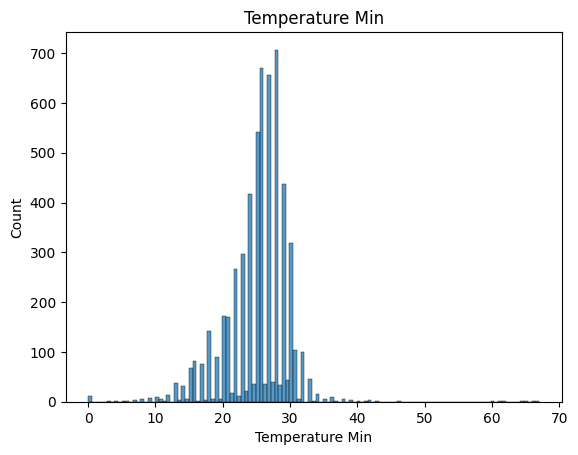

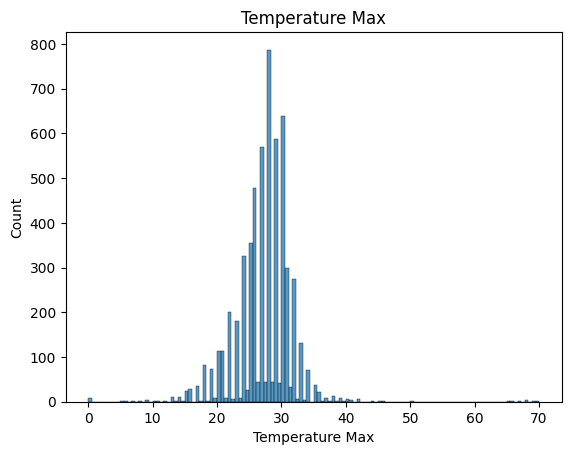

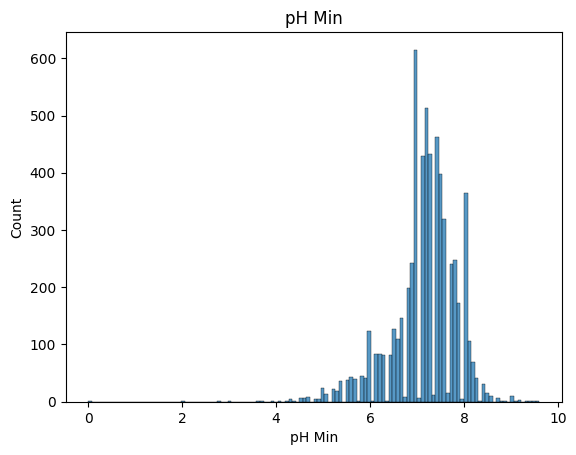

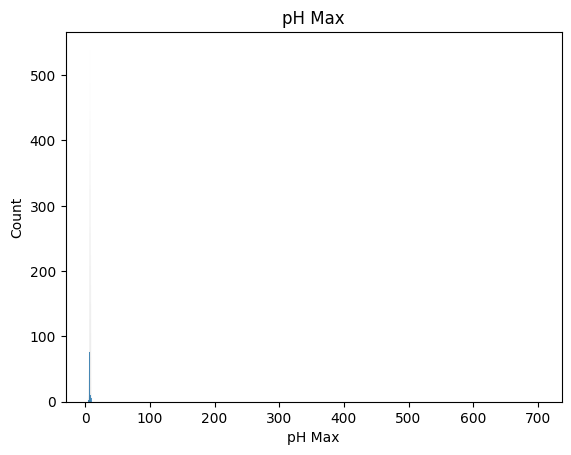

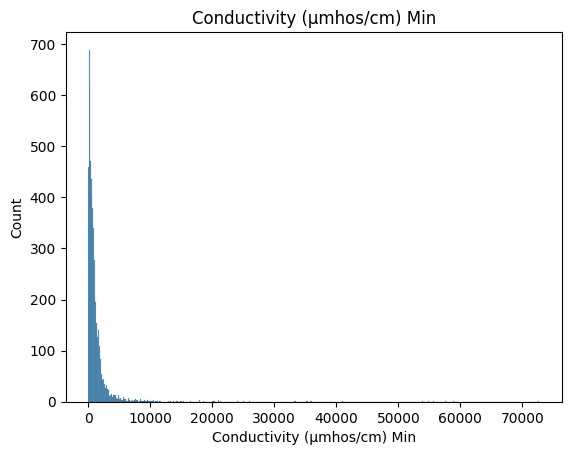

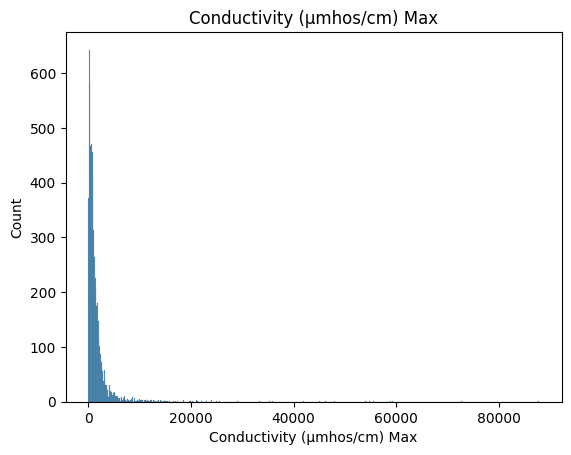

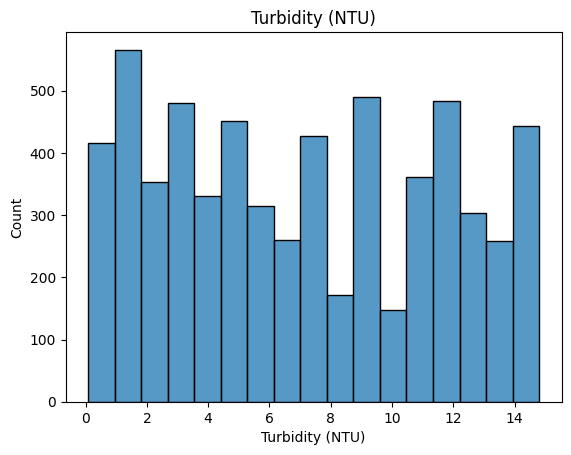

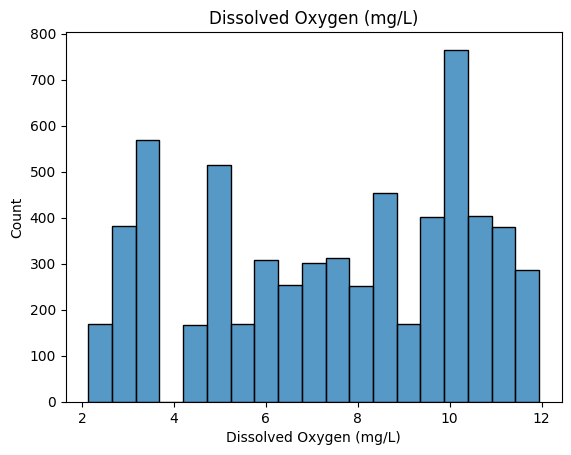

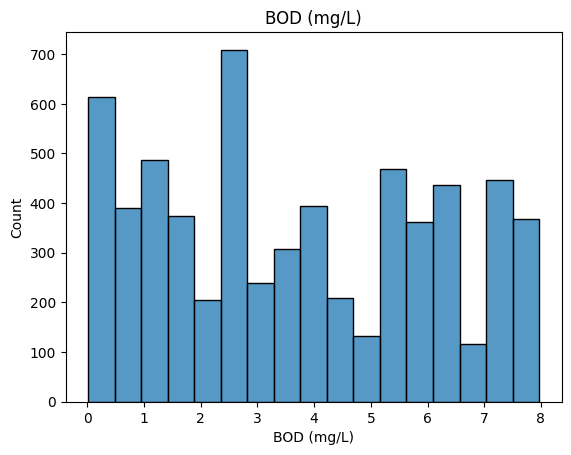

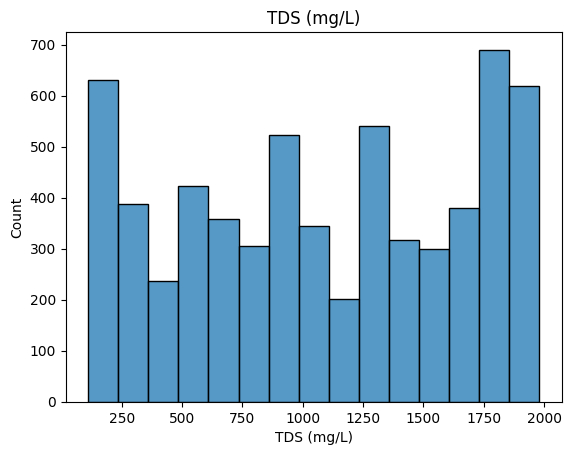

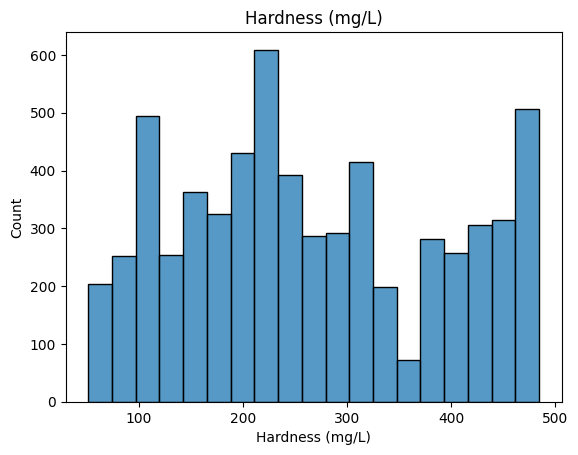

In [95]:
#histograms to understand the distribution
for i in selected_data.columns:
  sns.histplot(data=Dataset,x=i)
  plt.title(i)
  plt.show()


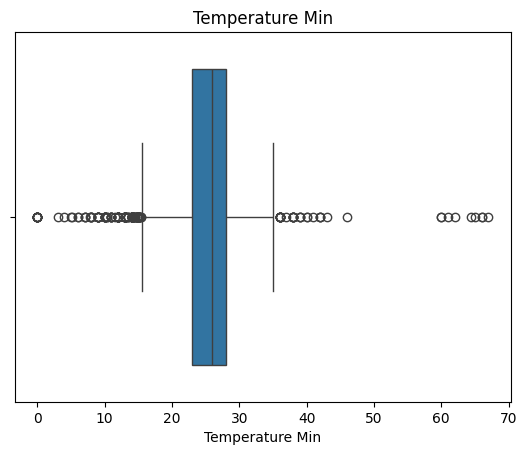

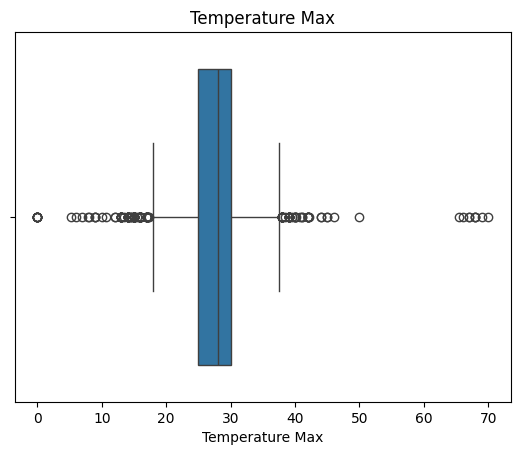

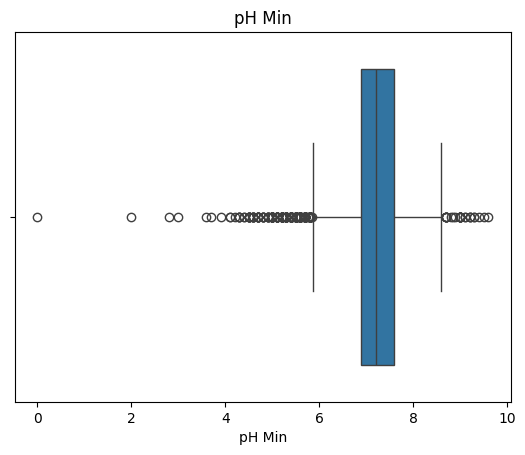

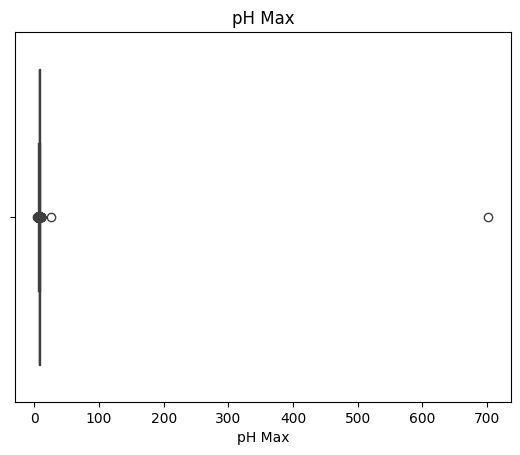

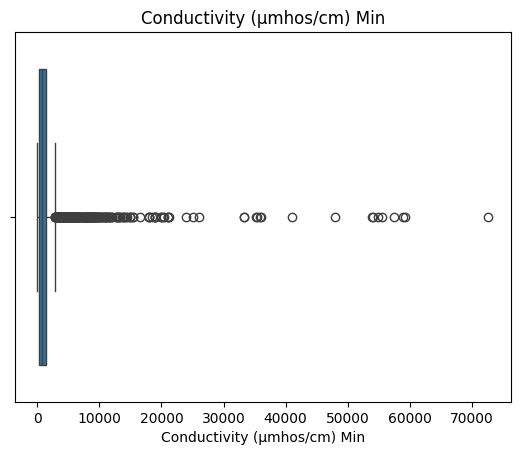

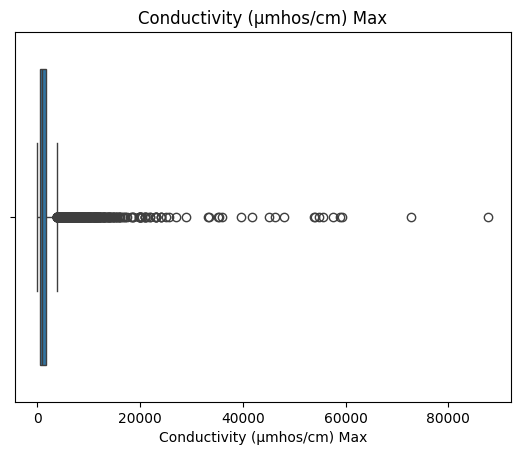

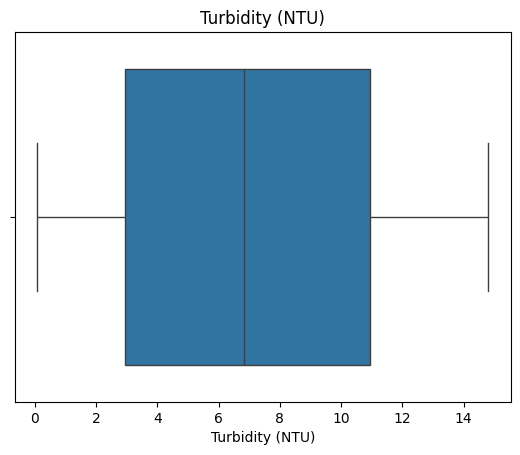

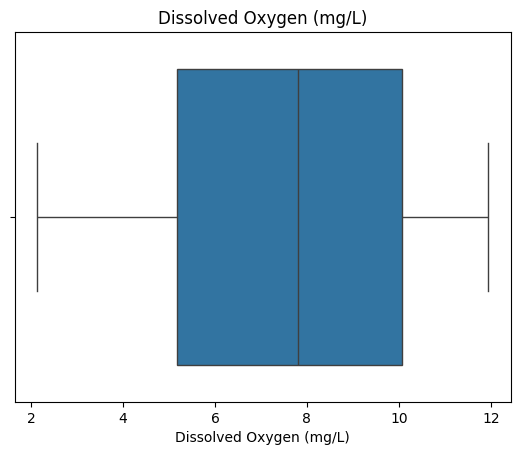

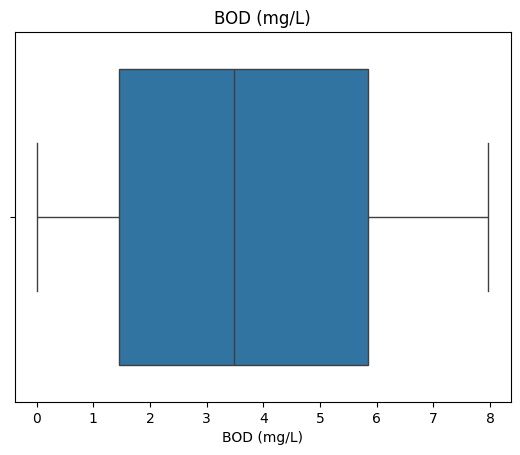

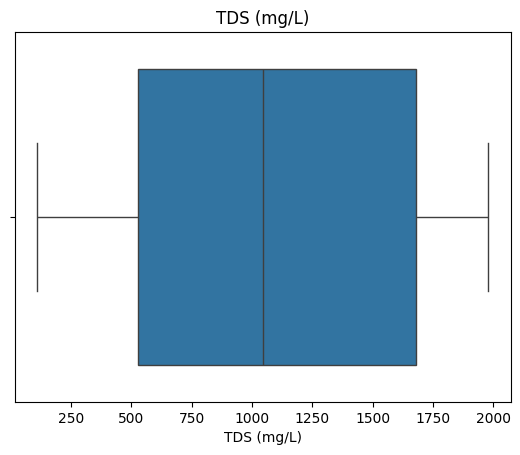

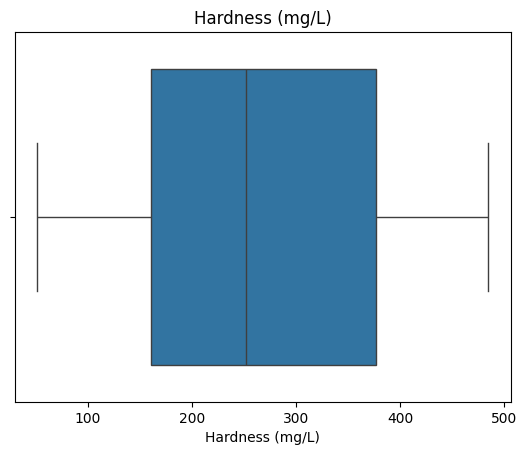

In [97]:
#Boxplot to identify Outliers
for i in selected_data.columns:
  sns.boxplot(data=Dataset,x=i)
  plt.title(i)
  plt.show()

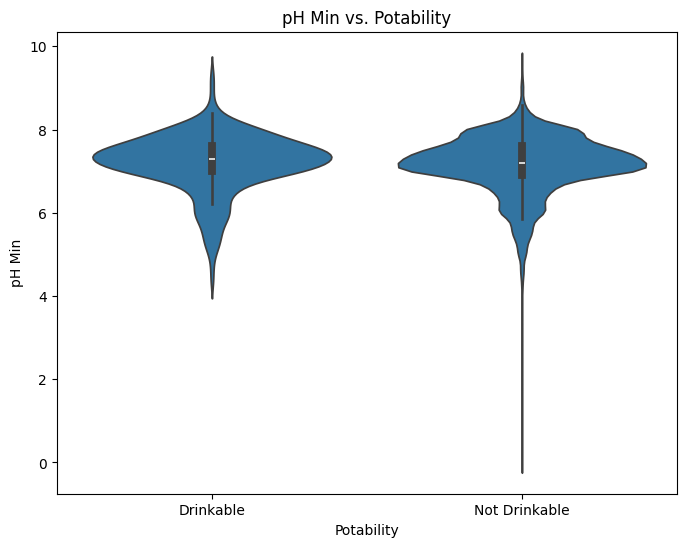

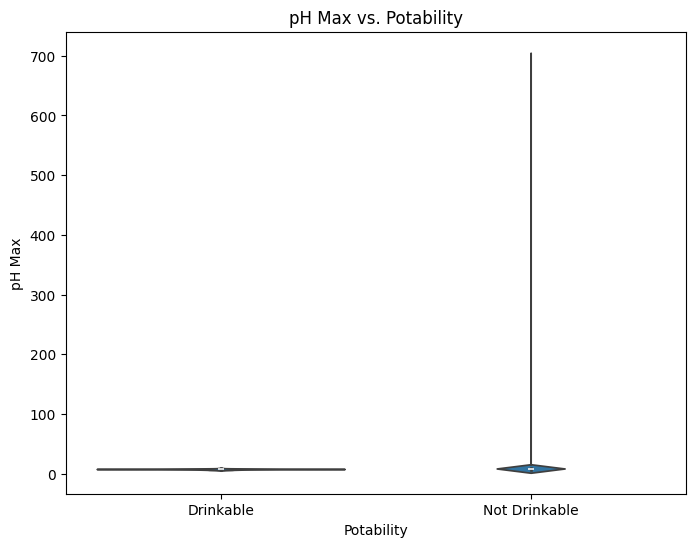

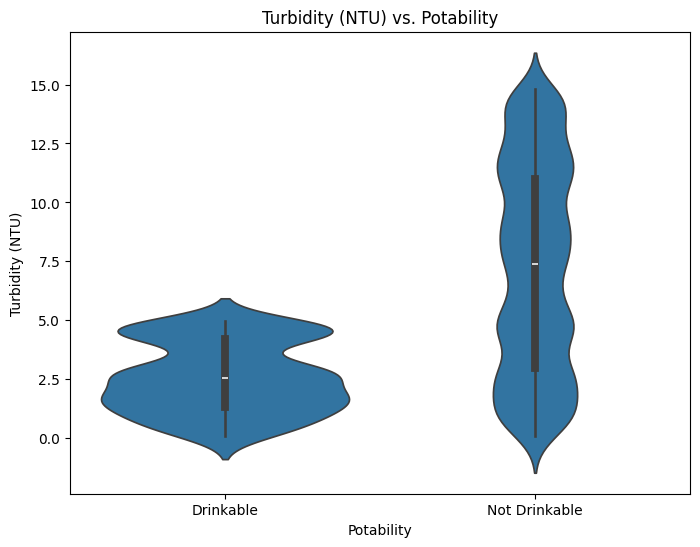

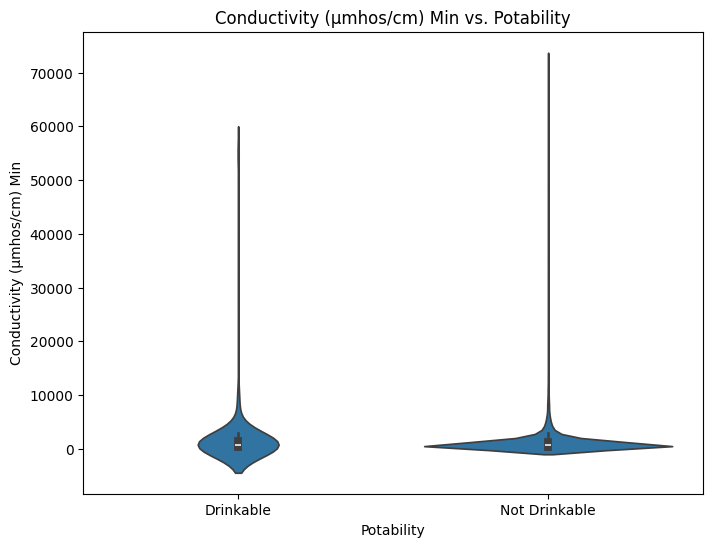

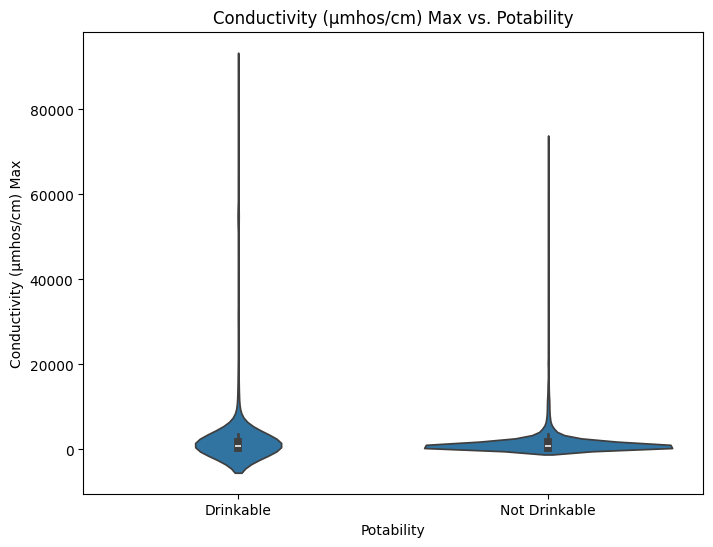

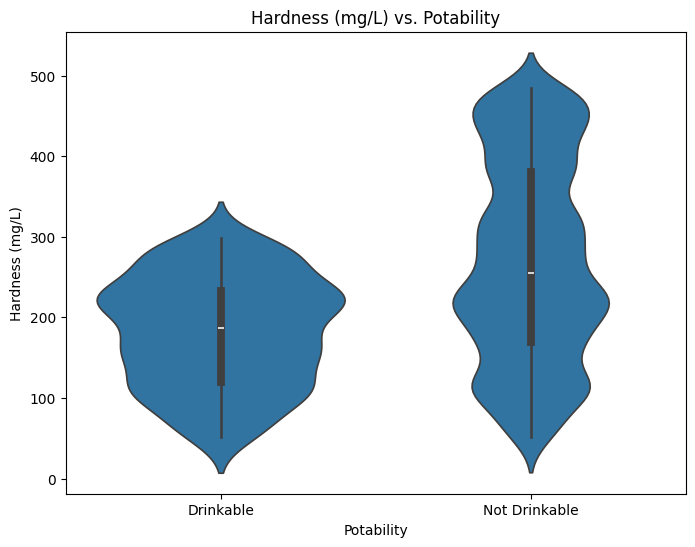

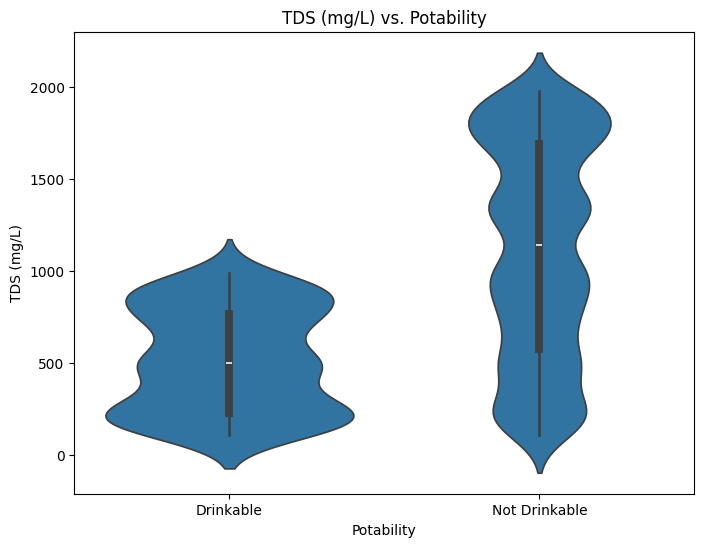

In [98]:
# prompt: give a best plotting technique which compares each attribute to potability other than histplot and boxplot

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'Dataset' and 'selected_data' are defined as in the previous code.

# Create a list of attributes to compare with potability
attributes = ['pH Min', 'pH Max', 'Turbidity (NTU)', 'Conductivity (µmhos/cm) Min',
              'Conductivity (µmhos/cm) Max', 'Hardness (mg/L)', 'TDS (mg/L)']

# Plotting using violinplots
for attribute in attributes:
    plt.figure(figsize=(8, 6))  # Adjust figure size as needed
    sns.violinplot(x='Potability', y=attribute, data=Dataset)
    plt.title(f'{attribute} vs. Potability')
    plt.xlabel('Potability')
    plt.ylabel(attribute)
    plt.show()

In [99]:
#correlation with heatmap to interpret the relation and multicolliniarity
corr =selected_data.corr()
corr

,Temperature Min,Temperature Max,pH Min,pH Max,Conductivity (µmhos/cm) Min,Conductivity (µmhos/cm) Max,Turbidity (NTU),Dissolved Oxygen (mg/L),BOD (mg/L),TDS (mg/L),Hardness (mg/L)
Temperature Min,1.000000,0.830448,0.123377,0.013942,0.089000,0.073487,0.009061,0.009368,-0.000166,-0.003191,0.011672
Temperature Max,0.830448,1.000000,0.081674,0.015695,0.065954,0.072768,-0.012094,0.019866,-0.010335,0.006327,-0.003233
pH Min,0.123377,0.081674,1.000000,0.070006,0.159941,0.163665,0.007405,0.000337,-0.010276,-0.017512,-0.001897
pH Max,0.013942,0.015695,0.070006,1.000000,0.013070,0.014312,0.002247,-0.019785,0.013073,-0.002856,0.000642
Conductivity (µmhos/cm) Min,0.089000,0.065954,0.159941,0.013070,1.000000,0.909731,-0.003163,0.027068,-0.015542,-0.014877,-0.009364
Conductivity (µmhos/cm) Max,0.073487,0.072768,0.163665,0.014312,0.909731,1.000000,0.001569,0.029100,-0.012572,-0.015586,-0.009966
Turbidity (NTU),0.009061,-0.012094,0.007405,0.002247,-0.003163,0.001569,1.000000,0.009649,-0.004839,0.009203,0.016756
Dissolved Oxygen (mg/L),0.009368,0.019866,0.000337,-0.019785,0.027068,0.029100,0.009649,1.000000,-0.006262,-0.000074,0.024323
BOD (mg/L),-0.000166,-0.010335,-0.010276,0.013073,-0.015542,-0.012572,-0.004839,-0.006262,1.000000,0.011733,0.000750
TDS (mg/L),-0.003191,0.006327,-0.017512,-0.002856,-0.014877,-0.015586,0.009203,-0.000074,0.011733,1.000000,-0.004154


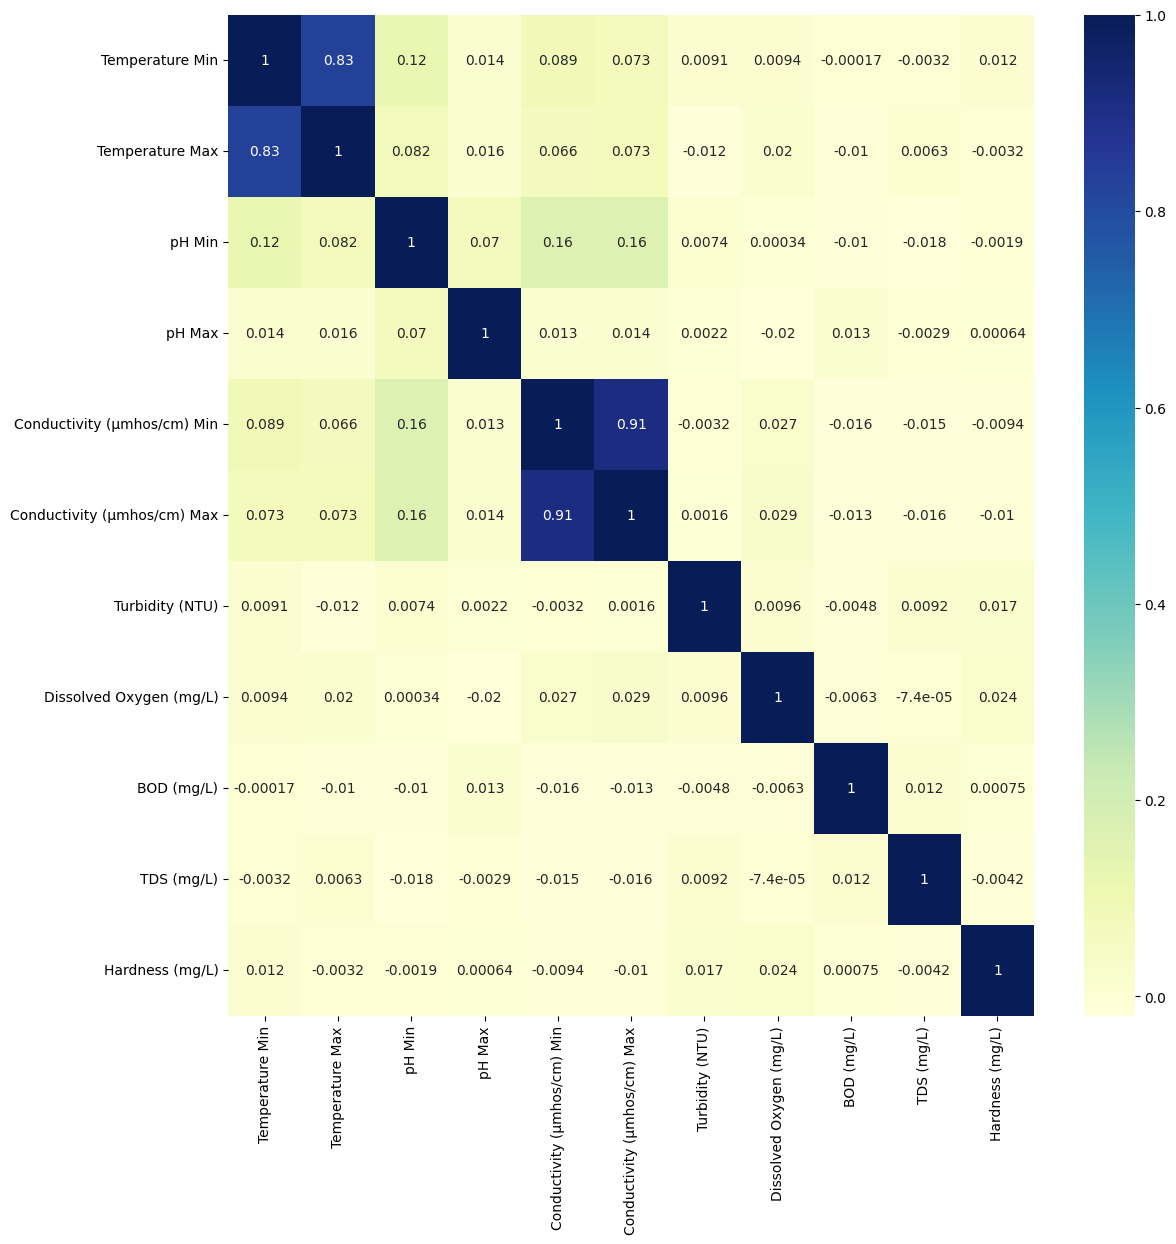

In [100]:
plt.figure(figsize=(13,13))
sns.heatmap(corr, annot=True, cmap="YlGnBu") # Change 'YlGnBu' to your desired colormap
plt.show()

##MISSING VALUE TREATMENT

In [101]:
Dataset.isnull().sum()

,0
Unnamed: 0,0
Station Code,76
Station Name,49
STATE,75
Temperature Min,498
Temperature Max,498
pH Min,121
pH Max,121
Conductivity (µmhos/cm) Min,192
Conductivity (µmhos/cm) Max,192


In [102]:
columns_to_impute = ['Turbidity (NTU)', 'Dissolved Oxygen (mg/L)', 'BOD (mg/L)', 'TDS (mg/L)', 'Hardness (mg/L)']

# Apply median imputation for each column
for column in columns_to_impute:
    median_value = Dataset[column].median()
    Dataset[column].fillna(median_value, inplace=True)

<ipython-input-102-2d5f67471d2f>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Dataset[column].fillna(median_value, inplace=True)


In [103]:
Dataset.isnull().sum()

,0
Unnamed: 0,0
Station Code,76
Station Name,49
STATE,75
Temperature Min,498
Temperature Max,498
pH Min,121
pH Max,121
Conductivity (µmhos/cm) Min,192
Conductivity (µmhos/cm) Max,192


In [104]:
import pandas as pd
from sklearn.impute import KNNImputer

knn_impute = ['Temperature Min', 'Temperature Max', 'pH Min', 'pH Max',
                     'Conductivity (µmhos/cm) Min', 'Conductivity (µmhos/cm) Max']

# Create a KNNImputer instance (using k=5 as a common choice)
imputer = KNNImputer(n_neighbors=5)

# Apply KNN imputation only to the specified columns
Dataset[knn_impute] = imputer.fit_transform(Dataset[knn_impute])


In [105]:
Dataset.isnull().sum()

,0
Unnamed: 0,0
Station Code,76
Station Name,49
STATE,75
Temperature Min,0
Temperature Max,0
pH Min,0
pH Max,0
Conductivity (µmhos/cm) Min,0
Conductivity (µmhos/cm) Max,0


In [107]:
Dataset = Dataset.dropna(subset=['Station Code'])
Dataset.isnull().sum()

,0
Unnamed: 0,0
Station Code,0
Station Name,0
STATE,0
Temperature Min,0
Temperature Max,0
pH Min,0
pH Max,0
Conductivity (µmhos/cm) Min,0
Conductivity (µmhos/cm) Max,0


In [108]:
Dataset

,Unnamed: 0,Station Code,Station Name,STATE,Temperature Min,Temperature Max,pH Min,pH Max,Conductivity (µmhos/cm) Min,Conductivity (µmhos/cm) Max,Year,Turbidity (NTU),Dissolved Oxygen (mg/L),BOD (mg/L),TDS (mg/L),Hardness (mg/L),Potability
0,0,15.0,"WELL AT KUYYURA, A.P.",ANDHRA PRADESH,23.0,28.0,6.82,7.85,195.0,226.0,2012,4.070235,10.134345,0.962008,578.810775,104.950680,Drinkable
1,1,16.0,WELL AT TADAVAI A.P.,ANDHRA PRADESH,27.0,28.0,7.21,7.72,663.0,1121.0,2012,11.564508,10.595564,7.927889,529.066337,205.746813,Not Drinkable
2,2,26.0,"WELL AT VIJAYWADA, A.P.",ANDHRA PRADESH,26.0,32.0,7.19,7.39,1601.0,1661.0,2012,14.543769,10.297229,1.070086,920.225147,217.964732,Not Drinkable
3,3,27.0,"WELL AT PEDDAVOORA, A.P.",ANDHRA PRADESH,26.0,27.0,7.82,8.80,1420.0,1668.0,2012,11.564508,10.297229,6.486625,1198.784496,182.125474,Not Drinkable
4,4,1513.0,"B W. - KRISHNA MURTHY, D.NO. 48-16-43 AUTONAGA...",ANDHRA PRADESH,25.0,30.0,6.80,7.11,1454.0,1575.0,2012,10.979909,3.262711,6.434438,1043.741646,123.066151,Not Drinkable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6311,983,2533.0,SURI TOWN NEAR BUS STAND,WEST BENGAL,27.0,30.0,7.20,7.90,358.0,651.0,2021,7.840992,8.334117,6.326797,723.104180,472.638138,Not Drinkable
6312,984,1773.0,"TANGRA, CALCUTTA , WEST\nBENGAL",WEST BENGAL,28.0,31.0,7.30,7.40,1435.0,1730.0,2021,4.675666,7.811954,5.193830,230.164378,234.763384,Not Drinkable
6313,985,1774.0,"TOPSIA CALCUTTA, WEST\nBENGAL",WEST BENGAL,29.0,31.0,7.30,7.30,1705.0,1921.0,2021,6.479175,5.978842,6.091671,920.225147,123.066151,Not Drinkable
6314,986,2546.0,ULUBERIA COLLEGE AT HOWRAH,WEST BENGAL,26.0,30.0,7.20,7.60,909.0,1090.0,2021,1.465082,8.737017,6.525324,480.030896,373.339982,Not Drinkable


##Handling Outliers

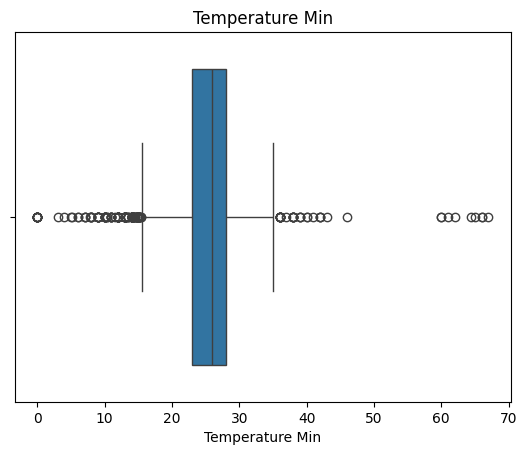

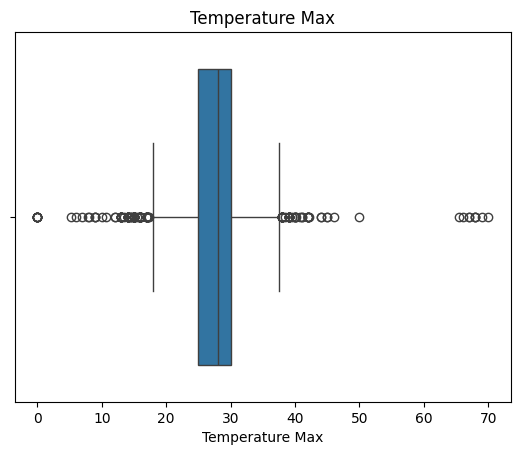

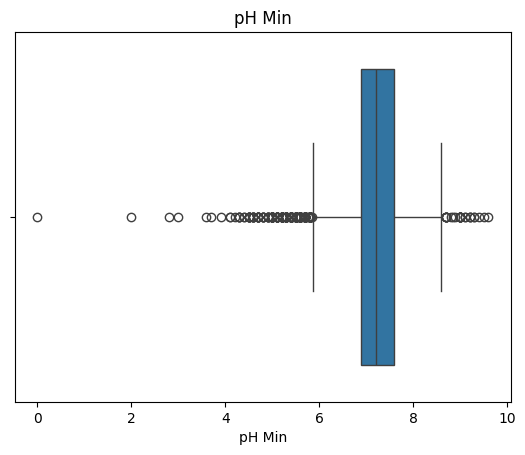

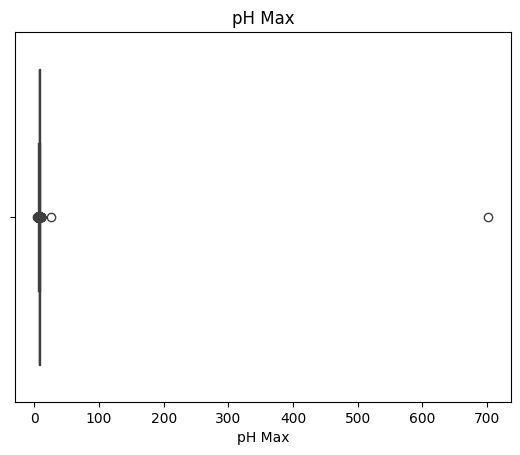

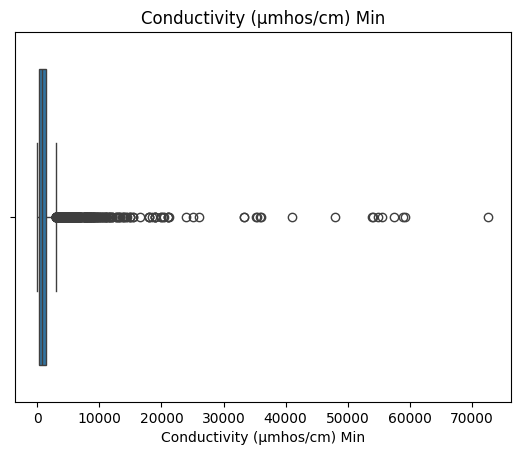

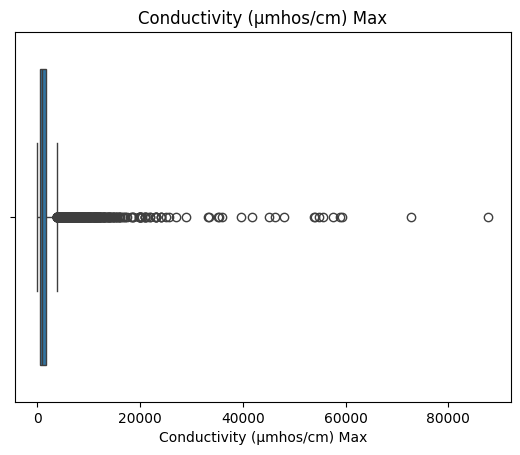

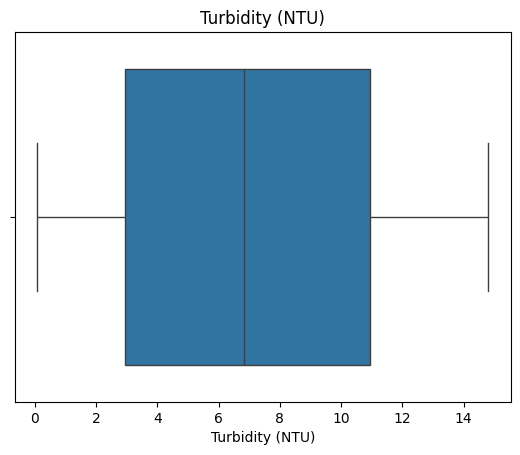

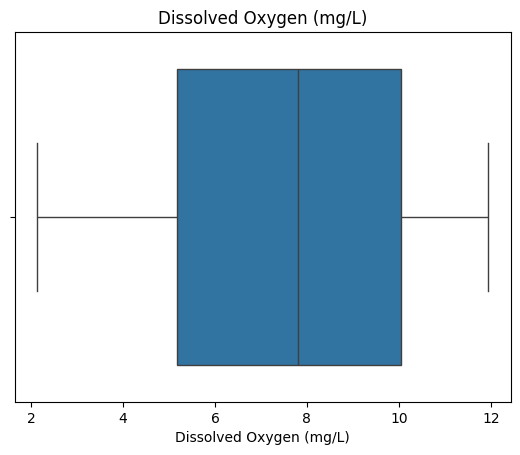

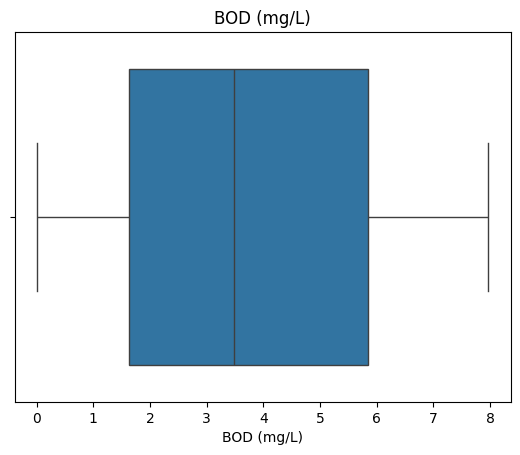

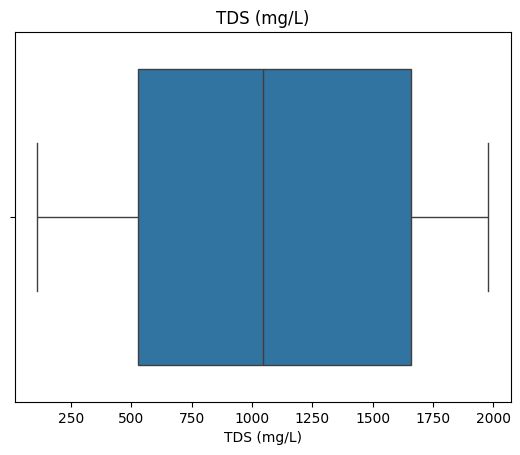

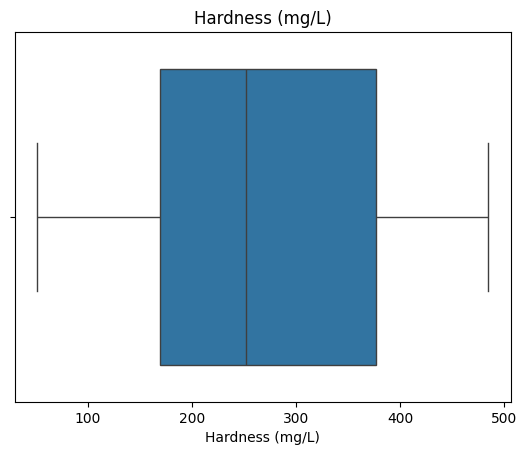

In [111]:
for i in selected_data.columns:
  sns.boxplot(data=Dataset,x=i)
  plt.title(i)
  plt.show()

In [6]:
# Calculate the mean values
Dataset['pH Mean'] = (Dataset['pH Min'] + Dataset['pH Max']) / 2
Dataset['Conductivity (µmhos/cm) Mean'] = (Dataset['Conductivity (µmhos/cm) Min'] + Dataset['Conductivity (µmhos/cm) Max']) / 2
Dataset['Temperature Mean'] = (Dataset['Temperature Min'] + Dataset['Temperature Max']) / 2

